In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
!curl https://camo.githubusercontent.com/336f0b43530f0123ea4cc25e8cedfb8e89b33f446ee4ecede0bcd38f1598c1ae/68747470733a2f2f7261772e6769746875622e636f6d2f6d696b6f6c616c7973656e6b6f2f6c656e612f6d61737465722f6c656e612e706e67 --output lena.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  462k  100  462k    0     0  1264k      0 --:--:-- --:--:-- --:--:-- 1264k


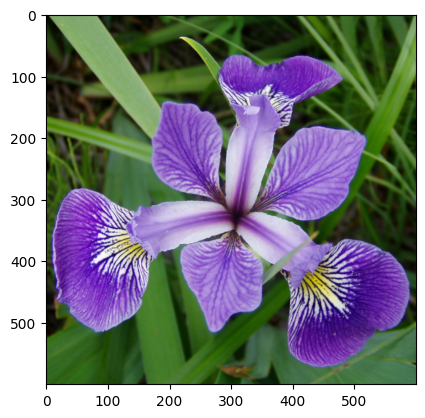

In [9]:
lena = cv2.imread("no_index/setal.jpg")[::, ::, ::-1]
plt.imshow(lena)

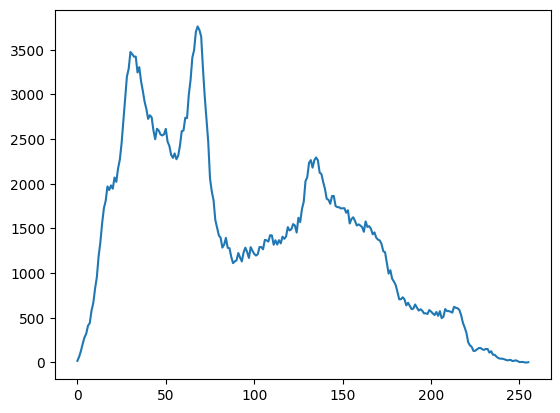

In [10]:
r, g, b = np.unstack(lena, axis=-1)
histogram, _ = np.histogram(r.ravel(), bins=256)
bin_edges = np.arange(0, 256)
plt.plot(bin_edges, histogram)

In [47]:
def equalize_image_hist(image_channel: np.array):
    histogram, _ = np.histogram(image_channel.ravel(), bins=256)
    img_cdf = (histogram / image_channel.size).cumsum()
    
    min, max = 50, 200
    def map(value):
        cdf_value = img_cdf[value]
        a = np.array([value, cdf_value])
        b = np.array([255.0, 1.0])
        projected = (a.dot(b) * b) / b.dot(b)
        projected_cdf_value = projected[1]
        return round(projected_cdf_value * (max - min) + min)
    
    mapping_fn = np.vectorize(map)
    return mapping_fn(image_channel)

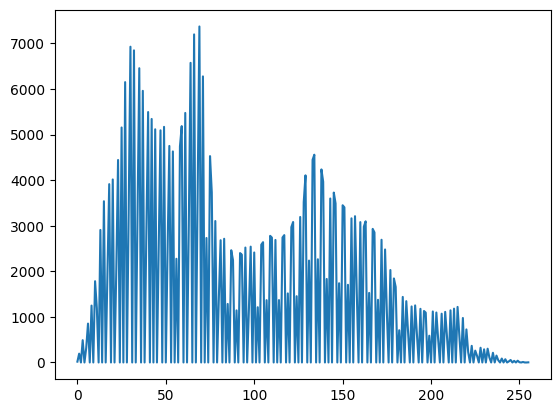

In [53]:
new_r = equalize_image_hist(r)
new_histogram, _ = np.histogram(new_r.ravel(), bins=256)
plt.plot(bin_edges, new_histogram)
# new_r.min()
# new_histogram

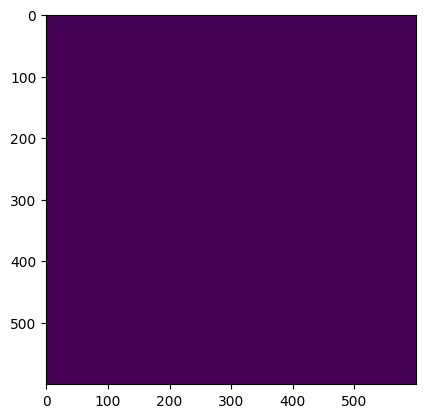

In [30]:
plt.imshow(new_r)